## This notebook shows the results of thr MovieLen Dataset with Filtered Ratings

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datareader import read_data, algs, display_ranks, combine_all_metrics

In [3]:
#sns.__version__

# Reading data

In [4]:
data, scores, test_users = read_data('Results for ML_new', 'ML')

In [5]:
all_metrics = combine_all_metrics(scores, data)

In [6]:
all_metrics  #.head()

,rank,step,model,Stability,HR,MRR,Coverage
0,10,Step_2,PureSVD,0.940213,0.035088,0.010756,0.075856
1,10,Step_2,PSI,0.949880,0.035088,0.010965,0.075290
2,10,Step_3,PureSVD,0.935089,0.020408,0.006560,0.067931
3,10,Step_3,PSI,0.932270,0.020408,0.006378,0.067365
4,10,Step_4,PureSVD,0.959667,0.010417,0.010417,0.071327
...,...,...,...,...,...,...,...
205,80,Step_6,PSI,0.918265,0.095238,0.020574,0.112369
206,80,Step_7,PureSVD,0.778999,0.052632,0.017836,0.121710
207,80,Step_7,PSI,0.906494,0.052632,0.025219,0.121993
208,80,Step_8,PureSVD,0.831674,0.034091,0.013920,0.117464


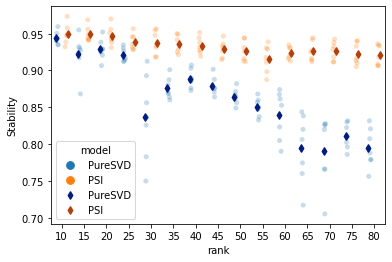

In [7]:
# Initialize the figure
f, ax = plt.subplots()
# sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="rank", y="Stability", hue="model",
              data=all_metrics, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="rank", y="Stability", hue="model",
              data=all_metrics, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Stability

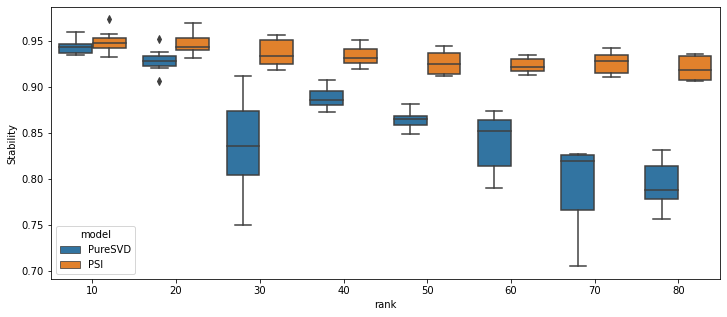

In [8]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='Stability', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

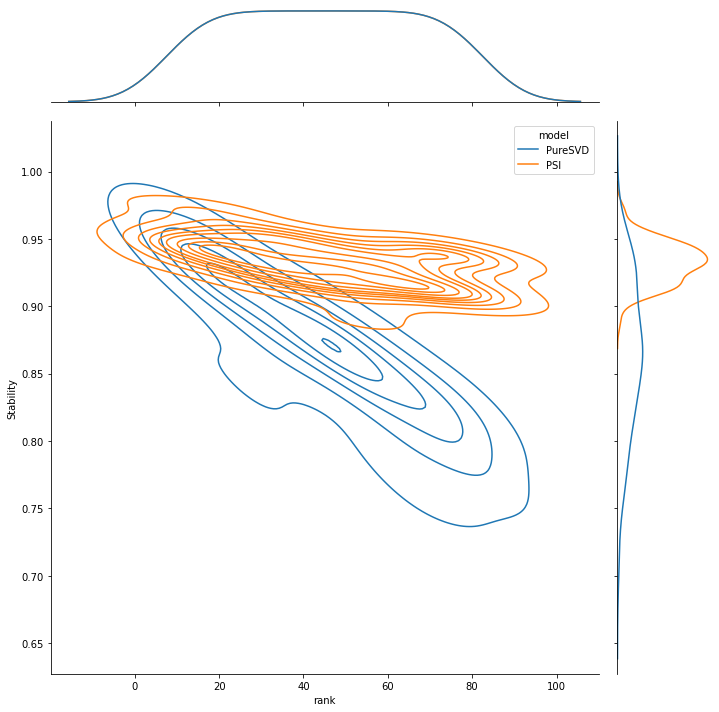

In [9]:
g = sns.jointplot(
    data=all_metrics,
    x='rank', y='Stability', hue='model',
    kind="kde",
    height=10
)

# HR

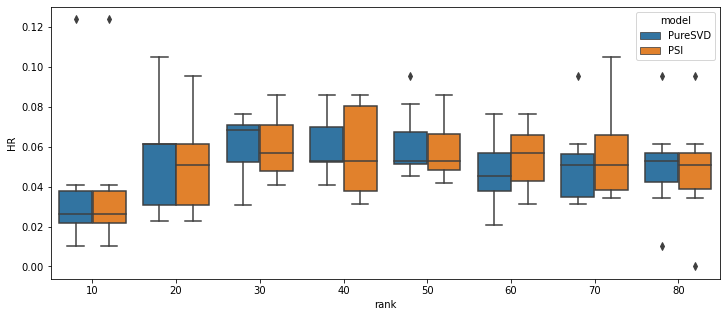

In [10]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='HR', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

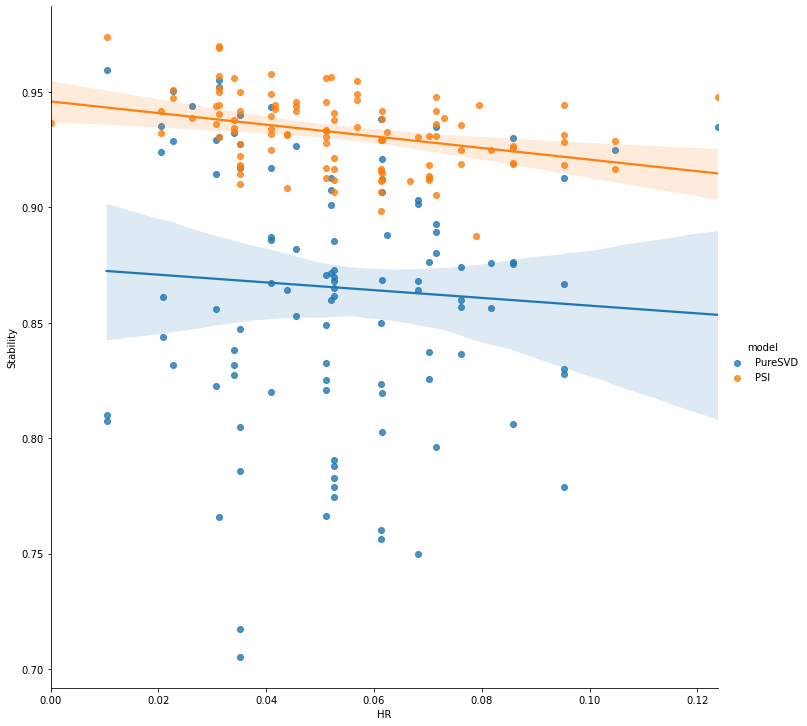

In [11]:
sns.lmplot(x='HR', y='Stability', hue='model', data=all_metrics, robust=True, height=10)

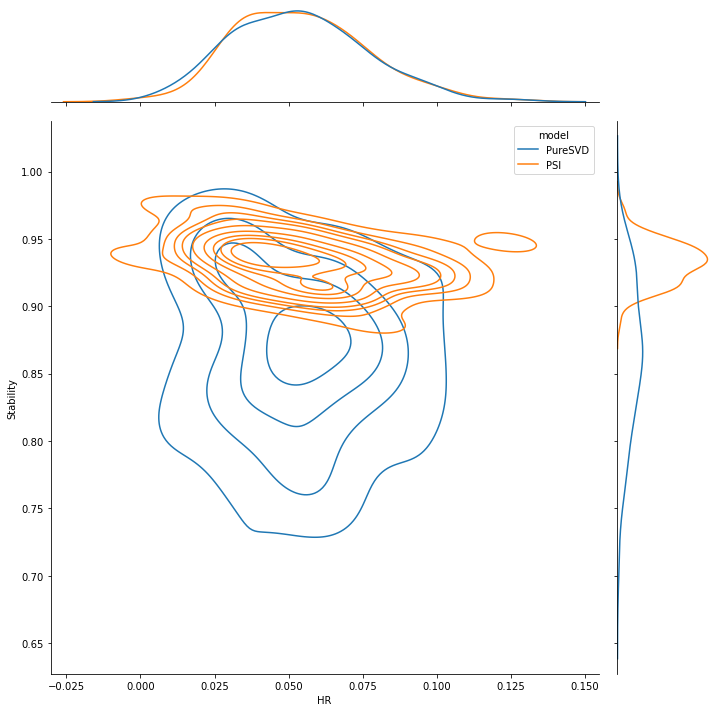

In [12]:
g = sns.jointplot(
    data=all_metrics,
    x='HR', y='Stability', hue='model',
    kind="kde", height=10
)

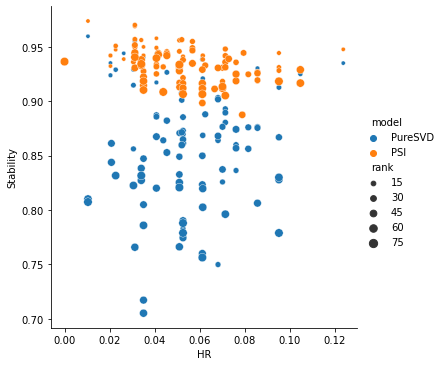

In [13]:
g = sns.relplot(
    data=all_metrics,
    x="HR", y="Stability",
    hue="model", size="rank"
)

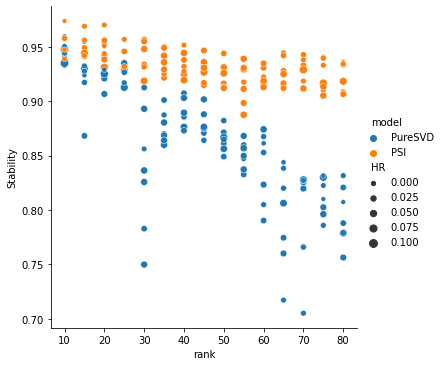

In [14]:
g = sns.relplot(
    data=all_metrics,
    x="rank", y="Stability",
    hue="model", size="HR"
)

## MRR

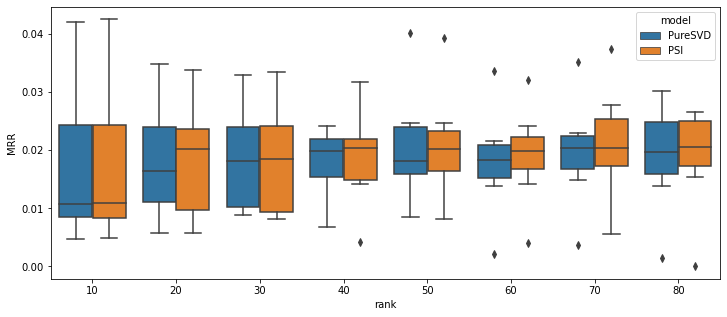

In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='MRR', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

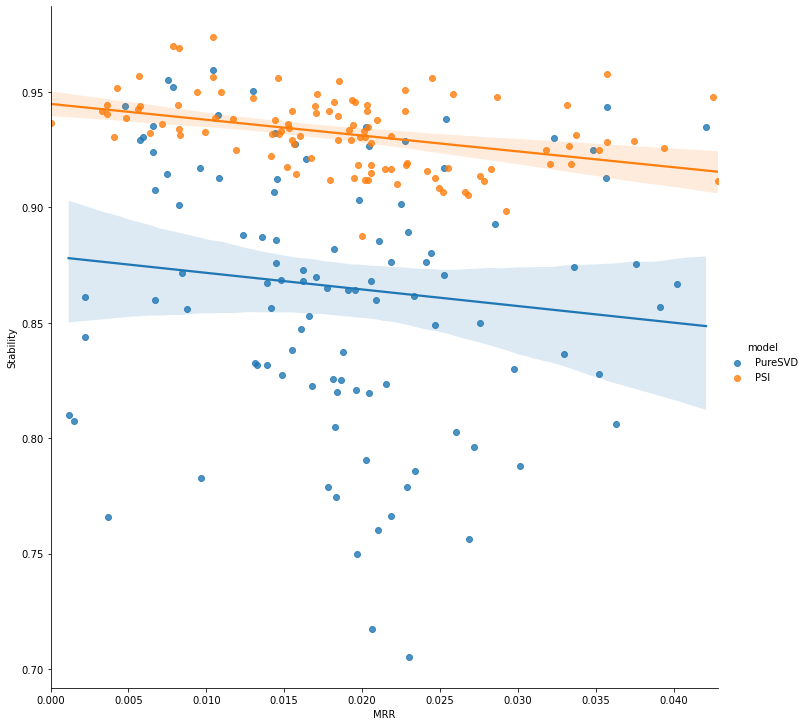

In [16]:
sns.lmplot(x='MRR', y='Stability', hue='model', data=all_metrics, robust=True, height=10)

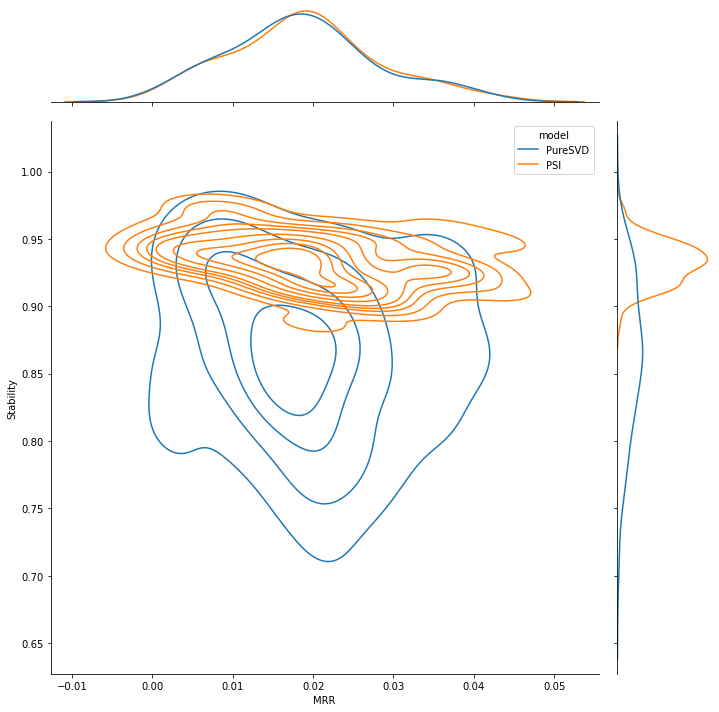

In [18]:
g = sns.jointplot(
    data=all_metrics,
    x='MRR', y='Stability', hue='model',
    kind="kde", height=10
)

## Coverage

In [19]:
all_metrics

,rank,step,model,Stability,HR,MRR,Coverage
0,10,Step_2,PureSVD,0.940213,0.035088,0.010756,0.075856
1,10,Step_2,PSI,0.949880,0.035088,0.010965,0.075290
2,10,Step_3,PureSVD,0.935089,0.020408,0.006560,0.067931
3,10,Step_3,PSI,0.932270,0.020408,0.006378,0.067365
4,10,Step_4,PureSVD,0.959667,0.010417,0.010417,0.071327
...,...,...,...,...,...,...,...
205,80,Step_6,PSI,0.918265,0.095238,0.020574,0.112369
206,80,Step_7,PureSVD,0.778999,0.052632,0.017836,0.121710
207,80,Step_7,PSI,0.906494,0.052632,0.025219,0.121993
208,80,Step_8,PureSVD,0.831674,0.034091,0.013920,0.117464


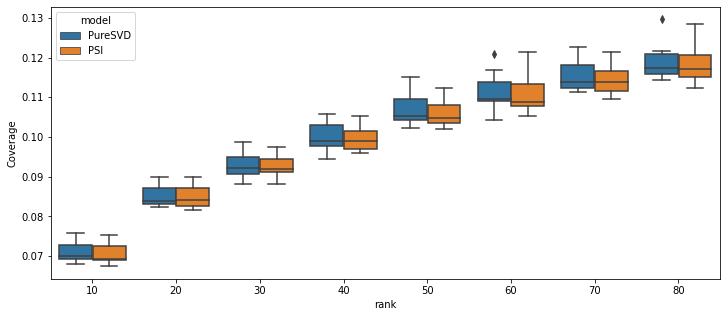

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='Coverage', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

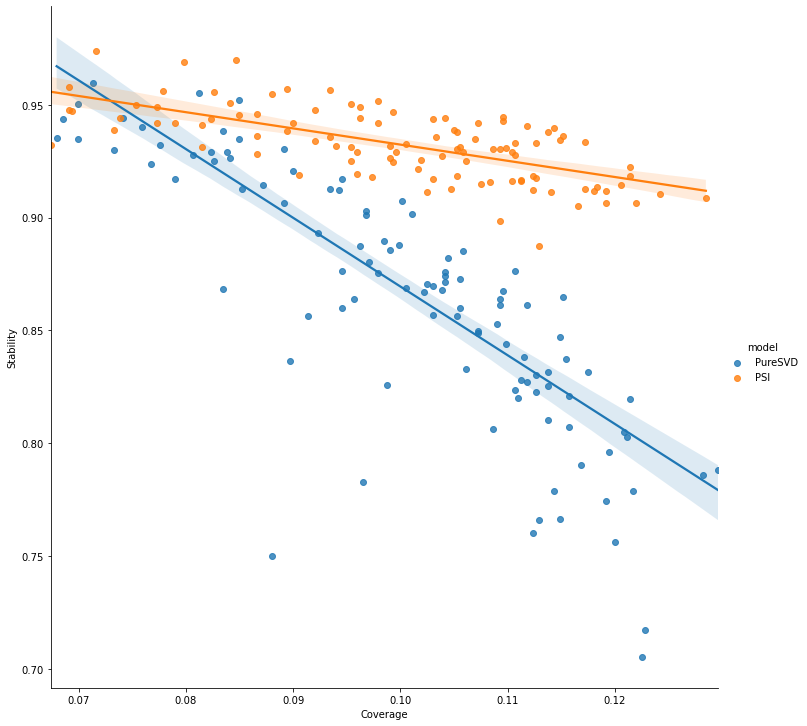

In [21]:
sns.lmplot(x='Coverage', y='Stability', hue='model', data=all_metrics, robust=True, height=10)

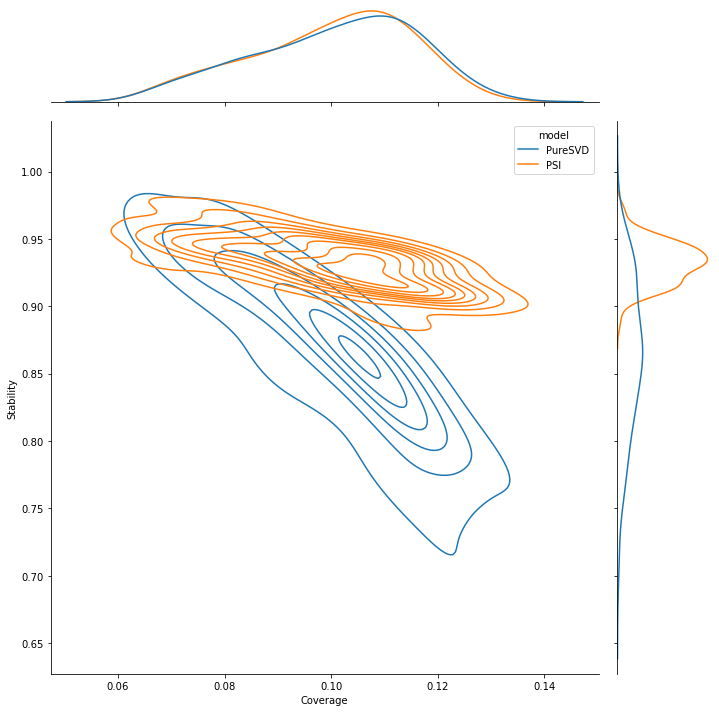

In [22]:
g = sns.jointplot(
    data=all_metrics,
    x='Coverage', y='Stability', hue='model',
    kind="kde", height=10
)

# ========

# Other views

## HR

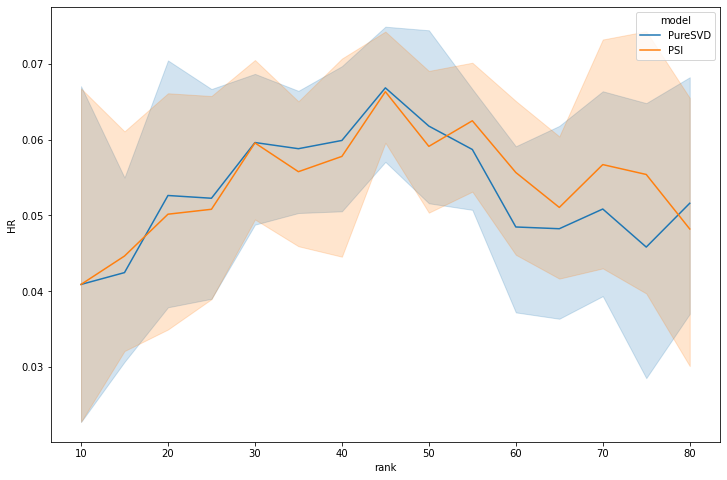

In [23]:
metric = 'HR'

plt.figure(figsize=(12, 8))
# sns.lineplot(data=mrr_data, x='rank', y='mrr', hue='model', err_style='bars', ci=95, err_kws=dict(capsize=10, capthick=2))
sns.lineplot(data=scores[metric]['long'], x='rank', y=metric, hue='model')

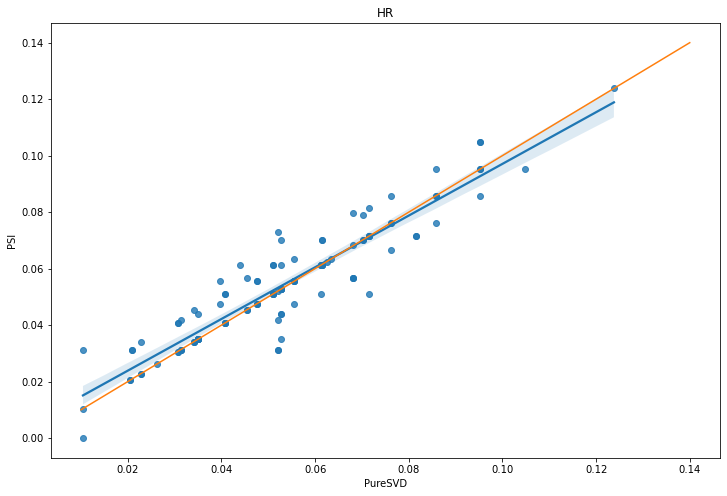

In [24]:
metric = 'HR'

plt.figure(figsize=(12, 8))
ax = sns.regplot(data=scores[metric]['wide'], x='PureSVD', y='PSI')
ax.plot([0.01, 0.14], [0.01, 0.14])
ax.set_title(metric);

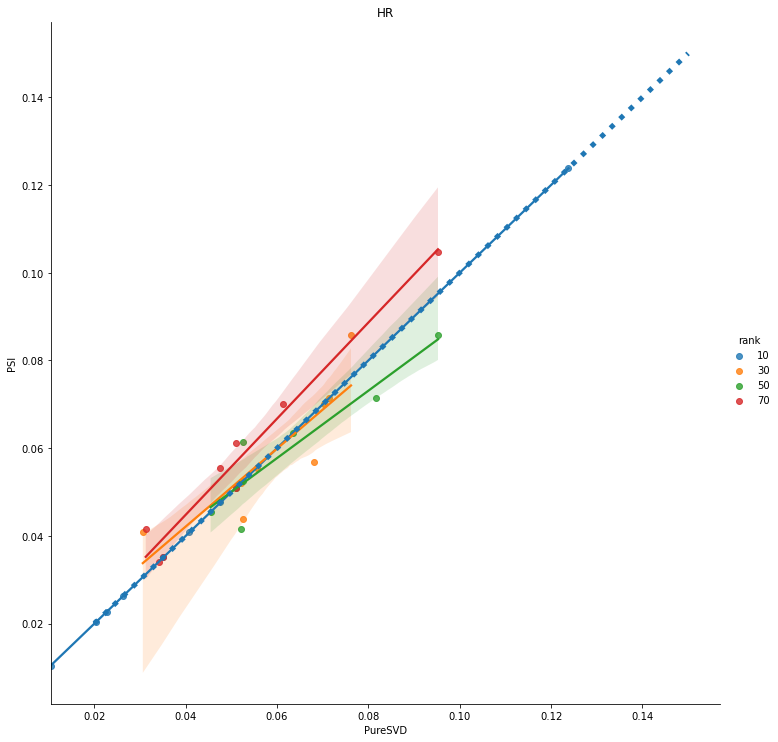

In [25]:
metric = 'HR'

g = sns.lmplot(
    data=scores[metric]['wide'].loc[[10, 30, 50, 70]].reset_index(),
    x="PureSVD", y="PSI", hue="rank",
    height=10
)
g.ax.plot([0.02, 0.15], [0.02, 0.15], ls=':', lw=5)
g.ax.set_title(metric);
# Use more informative axis labels than are provided by default
# g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

## MRR

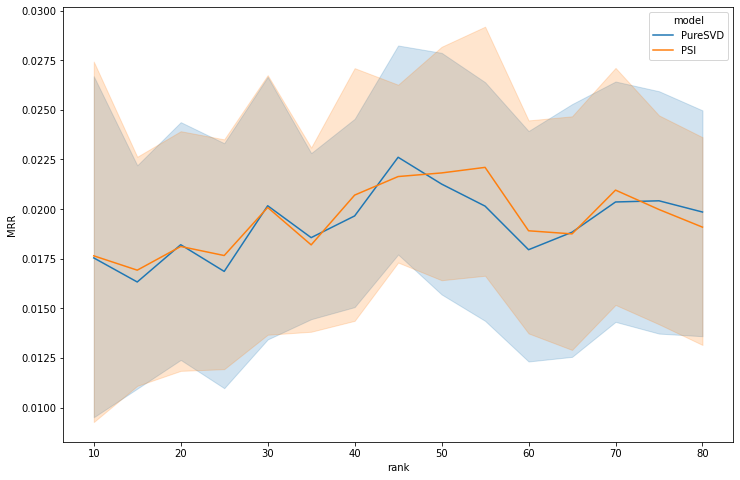

In [26]:
metric = 'MRR'

plt.figure(figsize=(12, 8))
# sns.lineplot(data=mrr_data, x='rank', y='mrr', hue='model', err_style='bars', ci=95, err_kws=dict(capsize=10, capthick=2))
sns.lineplot(data=scores[metric]['long'], x='rank', y=metric, hue='model')

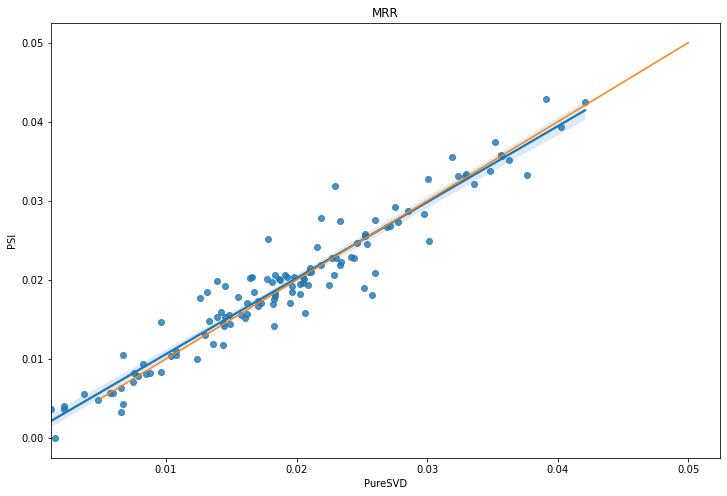

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(data=scores[metric]['wide'], x='PureSVD', y='PSI')
ax.plot([0.005, 0.05], [0.005, 0.05])
ax.set_title(metric);

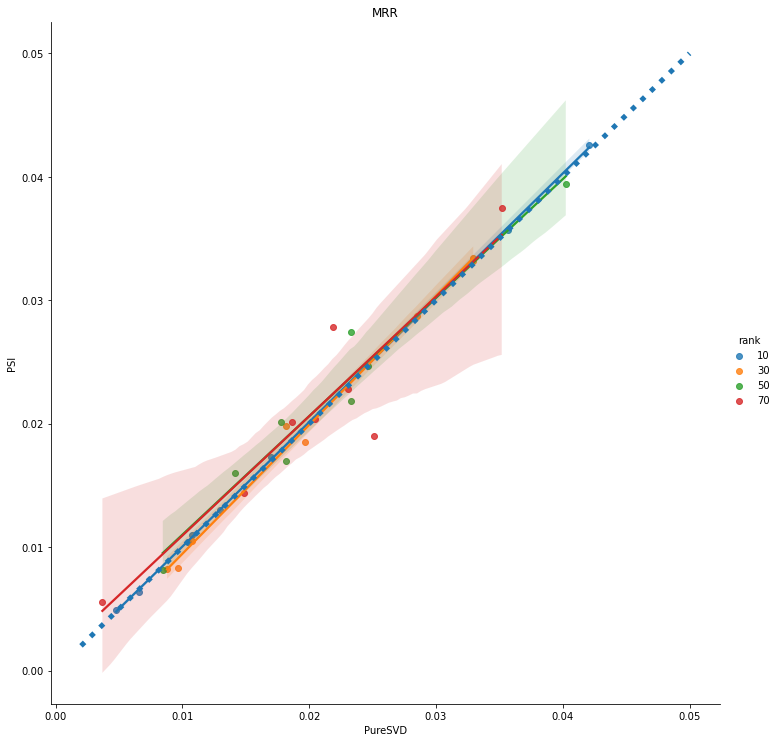

In [28]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=scores[metric]['wide'].loc[[10, 30, 50, 70]].reset_index(),
    x="PureSVD", y="PSI", hue="rank",
    height=10
)
g.ax.plot([0.002, 0.05], [0.002, 0.05], ls=':', lw=5)
g.ax.set_title(metric);
# Use more informative axis labels than are provided by default
# g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

## Coverage

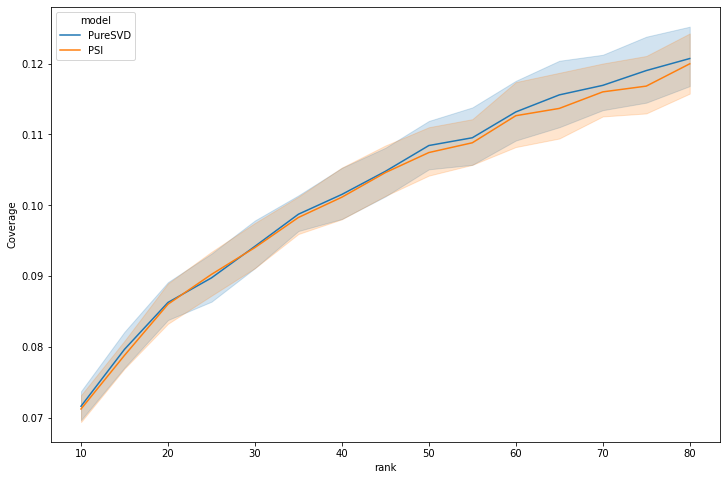

In [29]:
metric = 'Coverage'

plt.figure(figsize=(12, 8))
# sns.lineplot(data=mrr_data, x='rank', y='mrr', hue='model', err_style='bars', ci=95, err_kws=dict(capsize=10, capthick=2))
sns.lineplot(data=scores[metric]['long'], x='rank', y=metric, hue='model')

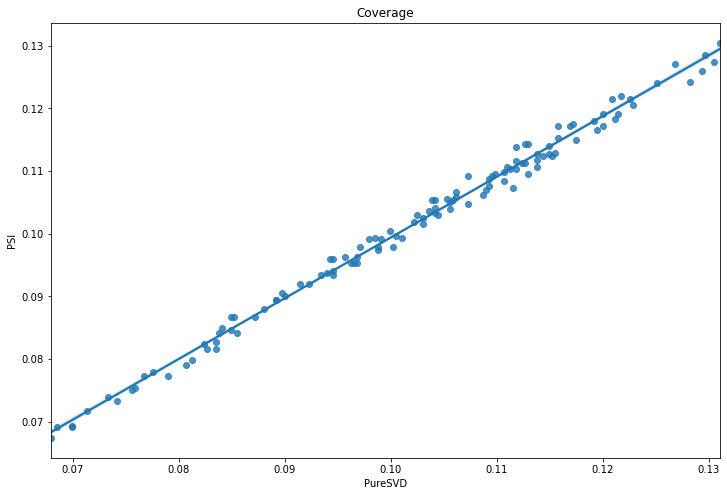

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(data=scores[metric]['wide'], x='PureSVD', y='PSI')
# ax.plot([0.005, 0.05], [0.005, 0.05])
ax.set_title(metric);

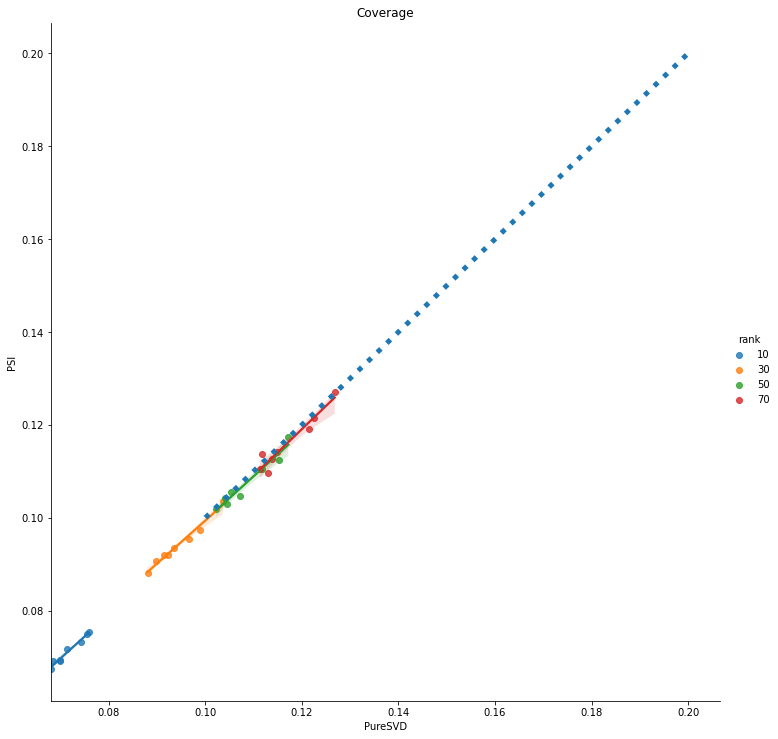

In [31]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=scores[metric]['wide'].loc[[10, 30, 50, 70]].reset_index(),
    x="PureSVD", y="PSI", hue="rank",
    height=10
)
g.ax.plot([0.1, 0.2], [0.1, 0.2], ls=':', lw=5)
g.ax.set_title(metric);
# Use more informative axis labels than are provided by default
# g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

## Stability

In [32]:
stab_avg = pd.concat(
    [
        data[alg]['Stability_df'].groupby(['rank', 'step'])[['Stability']].mean()
        for alg in algs
    ],
    keys = algs,
    axis=0
).rename_axis(index=['model', 'rank', 'step']).reset_index()
stab_avg.head()

,model,rank,step,Stability
0,PureSVD,10,step_1,0.940213
1,PureSVD,10,step_2,0.935089
2,PureSVD,10,step_3,0.959667
3,PureSVD,10,step_4,0.943625
4,PureSVD,10,step_5,0.935005


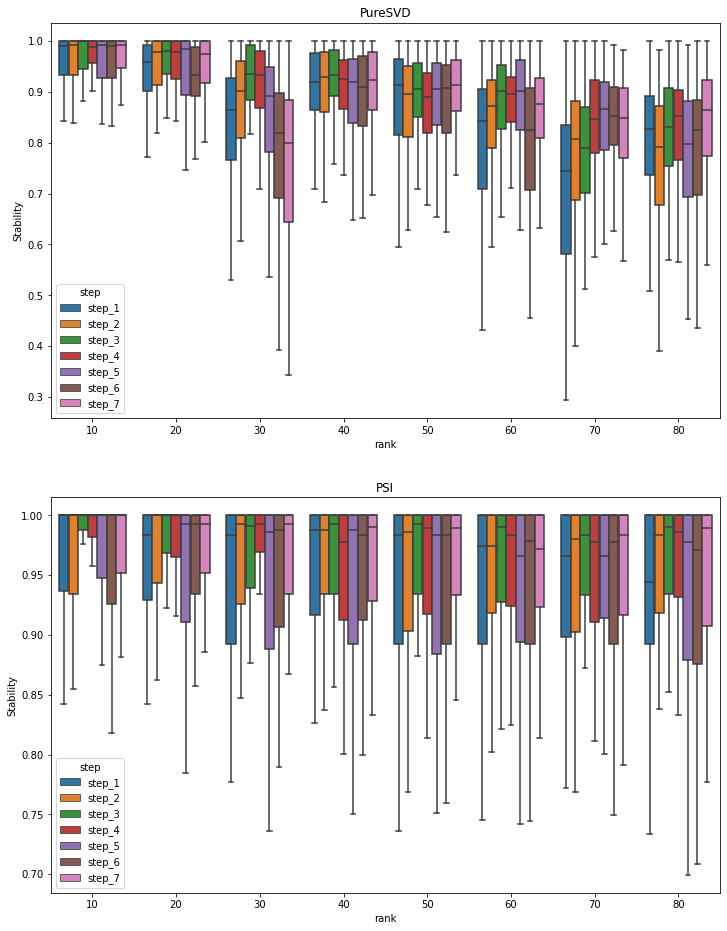

In [33]:
fig, axes = plt.subplots(len(algs), 1, figsize=(12, len(algs)*8))
for ax, alg in zip(axes, algs):
    sns.boxplot(ax=ax, x="rank", y="Stability", hue="step", showfliers=False,
                data=data[alg]['Stability_df'].query('rank in @display_ranks'))
    ax.set_title(alg);
# sns.despine(offset=10, trim=True)

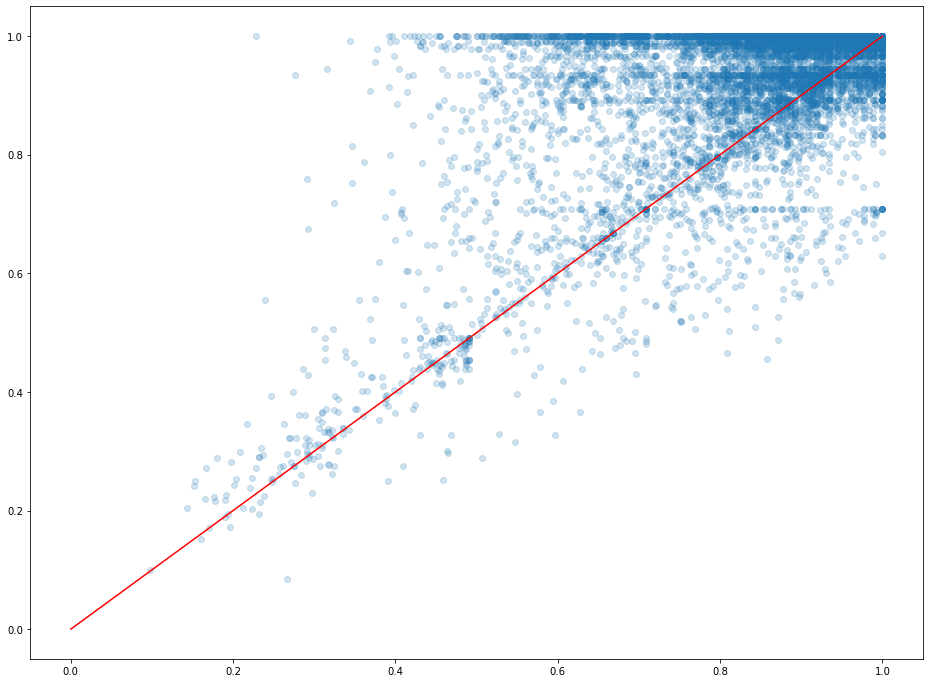

In [34]:
plt.figure(figsize=(16, 12))
plt.scatter(
    x=data[algs[0]]['Stability_df']['Stability'].sort_index(), # SVD
    y=data[algs[1]]['Stability_df']['Stability'].sort_index(), # PSI
    alpha=0.2
)
plt.plot([0, 1], [0, 1], c='r');

## UPD